## Task2

Extracted reviews for the movie Kashmir files from IMDB and performed sentiment analysis.


In [1]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re

from wordcloud import WordCloud
import matplotlib.pyplot as plt




We will get the user reviews of Kashmir files from IMDB

In [10]:
# creating empty reviews list
movie_reviews=[]
ip=[]
url ="https://www.imdb.com/title/tt10811166/reviews?ref_=tt_urv"
response = requests.get(url)
soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
reviews = soup.find_all("div", attrs={"class","text show-more__control"})# Extracting the content under specific tags  
for i in range(len(reviews)):
        ip.append(reviews[i].text) 
movie_reviews = ip


In [11]:
movie_reviews

["Not ever, has a film, left such a jarring and emotional impact on me, like The Kashmir Files. I've highly reccommended this film to a few people, already, after seeing it 3 nights ago, and I'm still reeling. This is not for the easily disturbed, and I'll be frank, there 's a lot of shocking violence, none more, near the outing, in it's last ten minutes, the chief violent scene, of the whole film, involving a graphic sawing. I'm not gonna go into the detail of The Kashmir Files. It keeps remnding you of the current Ukraine situation at you can't shake it off. Kumaar is such an engagingly fantastic, young actor, who delivers such a strong and powerfully effective performance, he had me immersed in his character, every second on screen. I hope to see much more of this actor, who has to be womderfully acknowledged for this. His character, an college student, is basically on a mission to uncover the facts about the atrocities in Kashmir, which has spread over a thirty year duration. For K

In [12]:
# writng reviews in a text file 
with open("movie.txt", "w", encoding='utf8') as output:
    output.write(str(movie_reviews))

In [13]:
# Joinining all the reviews into single paragraph 
ip_rev_string = " ".join(movie_reviews)

In [14]:
ip_rev_string

'Not ever, has a film, left such a jarring and emotional impact on me, like The Kashmir Files. I\'ve highly reccommended this film to a few people, already, after seeing it 3 nights ago, and I\'m still reeling. This is not for the easily disturbed, and I\'ll be frank, there \'s a lot of shocking violence, none more, near the outing, in it\'s last ten minutes, the chief violent scene, of the whole film, involving a graphic sawing. I\'m not gonna go into the detail of The Kashmir Files. It keeps remnding you of the current Ukraine situation at you can\'t shake it off. Kumaar is such an engagingly fantastic, young actor, who delivers such a strong and powerfully effective performance, he had me immersed in his character, every second on screen. I hope to see much more of this actor, who has to be womderfully acknowledged for this. His character, an college student, is basically on a mission to uncover the facts about the atrocities in Kashmir, which has spread over a thirty year duration.

In [15]:
import nltk
# from nltk.corpus import stopwords

# Removing unwanted symbols incase if exists
ip_rev_string = re.sub("[^A-Za-z" "]+", " ", ip_rev_string).lower()
# ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

# words that contained in the reviews
ip_reviews_words = ip_rev_string.split(" ")

ip_reviews_words = ip_reviews_words[1:]



In [16]:
ip_rev_string

'not ever has a film left such a jarring and emotional impact on me like the kashmir files i ve highly reccommended this film to a few people already after seeing it nights ago and i m still reeling this is not for the easily disturbed and i ll be frank there s a lot of shocking violence none more near the outing in it s last ten minutes the chief violent scene of the whole film involving a graphic sawing i m not gonna go into the detail of the kashmir files it keeps remnding you of the current ukraine situation at you can t shake it off kumaar is such an engagingly fantastic young actor who delivers such a strong and powerfully effective performance he had me immersed in his character every second on screen i hope to see much more of this actor who has to be womderfully acknowledged for this his character an college student is basically on a mission to uncover the facts about the atrocities in kashmir which has spread over a thirty year duration for kashmir it s personal his peers don

In [17]:
ip_reviews_words

['ever',
 'has',
 'a',
 'film',
 'left',
 'such',
 'a',
 'jarring',
 'and',
 'emotional',
 'impact',
 'on',
 'me',
 'like',
 'the',
 'kashmir',
 'files',
 'i',
 've',
 'highly',
 'reccommended',
 'this',
 'film',
 'to',
 'a',
 'few',
 'people',
 'already',
 'after',
 'seeing',
 'it',
 'nights',
 'ago',
 'and',
 'i',
 'm',
 'still',
 'reeling',
 'this',
 'is',
 'not',
 'for',
 'the',
 'easily',
 'disturbed',
 'and',
 'i',
 'll',
 'be',
 'frank',
 'there',
 's',
 'a',
 'lot',
 'of',
 'shocking',
 'violence',
 'none',
 'more',
 'near',
 'the',
 'outing',
 'in',
 'it',
 's',
 'last',
 'ten',
 'minutes',
 'the',
 'chief',
 'violent',
 'scene',
 'of',
 'the',
 'whole',
 'film',
 'involving',
 'a',
 'graphic',
 'sawing',
 'i',
 'm',
 'not',
 'gonna',
 'go',
 'into',
 'the',
 'detail',
 'of',
 'the',
 'kashmir',
 'files',
 'it',
 'keeps',
 'remnding',
 'you',
 'of',
 'the',
 'current',
 'ukraine',
 'situation',
 'at',
 'you',
 'can',
 't',
 'shake',
 'it',
 'off',
 'kumaar',
 'is',
 'such',
 '

In [18]:
type(ip_reviews_words)

list

In [33]:
#TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer(ip_reviews_words, use_idf=True, ngram_range=(1, 1))
vectorizer=TfidfVectorizer(use_idf=True) 
X = vectorizer.fit_transform(ip_reviews_words)

with open("stop.txt", "r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n")

stop_words.extend(["kashmir",'files',"vivek","movie","film","anupam","kher","mithun","Pallavi","joshi","darshan","agnihotri",'puneet','bhasha'])

ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]



In [34]:
ip_reviews_words

['left',
 'jarring',
 'emotional',
 'impact',
 've',
 'highly',
 'reccommended',
 'people',
 'nights',
 'ago',
 'reeling',
 'easily',
 'disturbed',
 'll',
 'frank',
 'lot',
 'shocking',
 'violence',
 'outing',
 'ten',
 'minutes',
 'chief',
 'violent',
 'scene',
 'involving',
 'graphic',
 'sawing',
 'gonna',
 'detail',
 'remnding',
 'current',
 'ukraine',
 'situation',
 'shake',
 'kumaar',
 'engagingly',
 'fantastic',
 'young',
 'actor',
 'delivers',
 'strong',
 'powerfully',
 'effective',
 'performance',
 'immersed',
 'character',
 'screen',
 'hope',
 'actor',
 'womderfully',
 'acknowledged',
 'character',
 'college',
 'student',
 'basically',
 'mission',
 'uncover',
 'facts',
 'atrocities',
 'spread',
 'thirty',
 'year',
 'duration',
 'personal',
 'peers',
 'don',
 'support',
 'theories',
 'including',
 'female',
 'tutor',
 'make',
 'guilty',
 'party',
 'hidden',
 'meaning',
 'facade',
 'onset',
 'haven',
 'cinematically',
 'tkf',
 'ruling',
 'minority',
 'weak',
 'stomached',
 'easil

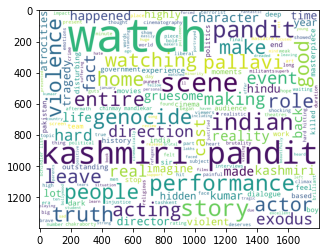

In [35]:
# Joining all the reviews into single paragraph 
ip_rev_string = " ".join(ip_reviews_words)

# WordCloud can be performed on the string inputs.
# Corpus level word cloud

wordcloud_ip = WordCloud(background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_rev_string)
plt.imshow(wordcloud_ip)



In [24]:
# positive words # Choose the path for +ve words stored in system
with open("positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")



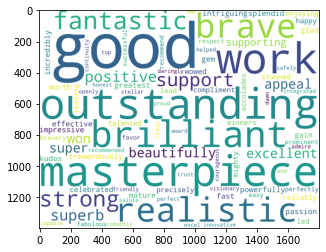

In [36]:
# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(2)
plt.imshow(wordcloud_pos_in_pos)



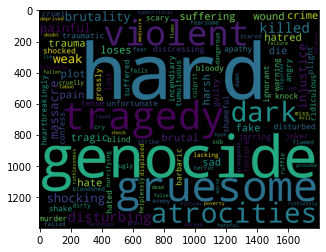

In [26]:
# negative words Choose path for -ve words stored in system
with open("negative-words.txt", "r") as neg:
  negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
ip_neg_in_neg = " ".join ([w for w in ip_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(ip_neg_in_neg)
plt.figure(3)
plt.imshow(wordcloud_neg_in_neg)




In [53]:
# wordcloud with bigram
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS

WNL = nltk.WordNetLemmatizer()

# Lowercase and tokenize
text = ip_rev_string.lower()

# Remove single quote early since it causes problems with the tokenizer.
text = text.replace("'", "")

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

# Create a set of stopwords
stopwords_wc = set(STOPWORDS)
customised_words = ['files',"vivek","movie","film","anupam","kher","mithun","pallavi","joshi","darshan","agnihotri",'mandlekar','puneet','bhasha'] # If you want to remove any particular word form text which does not contribute much in meaning

new_stopwords = stopwords_wc.union(customised_words)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aanand.ORADEV\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
new_stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'agnihotri',
 'all',
 'also',
 'am',
 'an',
 'and',
 'anupam',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bhasha',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'darshan',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'files',
 'film',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'joshi',
 'just',
 'k',
 'kher',
 "let's",
 'like',
 'mandlekar',
 'me',
 'mithun',
 'more',
 'most',
 'movie',
 "mustn't",
 'my',
 'm

In [55]:
# Remove stop words
text_content = [word for word in text_content if word not in new_stopwords]

# Take only non-empty entries
text_content = [s for s in text_content if len(s) != 0]

# Best to get the lemmas of each word to reduce the number of similar words
text_content = [WNL.lemmatize(t) for t in text_content]

# nltk_tokens = nltk.word_tokenize(text)  
bigrams_list = list(nltk.bigrams(text_content))
bigrams_list



[('left', 'jarring'),
 ('jarring', 'emotional'),
 ('emotional', 'impact'),
 ('impact', 've'),
 ('ve', 'highly'),
 ('highly', 'reccommended'),
 ('reccommended', 'people'),
 ('people', 'night'),
 ('night', 'ago'),
 ('ago', 'reeling'),
 ('reeling', 'easily'),
 ('easily', 'disturbed'),
 ('disturbed', 'll'),
 ('ll', 'frank'),
 ('frank', 'lot'),
 ('lot', 'shocking'),
 ('shocking', 'violence'),
 ('violence', 'outing'),
 ('outing', 'ten'),
 ('ten', 'minute'),
 ('minute', 'chief'),
 ('chief', 'violent'),
 ('violent', 'scene'),
 ('scene', 'involving'),
 ('involving', 'graphic'),
 ('graphic', 'sawing'),
 ('sawing', 'gon'),
 ('gon', 'na'),
 ('na', 'detail'),
 ('detail', 'remnding'),
 ('remnding', 'current'),
 ('current', 'ukraine'),
 ('ukraine', 'situation'),
 ('situation', 'shake'),
 ('shake', 'kumaar'),
 ('kumaar', 'engagingly'),
 ('engagingly', 'fantastic'),
 ('fantastic', 'young'),
 ('young', 'actor'),
 ('actor', 'delivers'),
 ('delivers', 'strong'),
 ('strong', 'powerfully'),
 ('powerfully', 

In [28]:
#nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aanand.ORADEV\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [56]:
dictionary2 = [' '.join(tup) for tup in bigrams_list]
dictionary2

['left jarring',
 'jarring emotional',
 'emotional impact',
 'impact ve',
 've highly',
 'highly reccommended',
 'reccommended people',
 'people night',
 'night ago',
 'ago reeling',
 'reeling easily',
 'easily disturbed',
 'disturbed ll',
 'll frank',
 'frank lot',
 'lot shocking',
 'shocking violence',
 'violence outing',
 'outing ten',
 'ten minute',
 'minute chief',
 'chief violent',
 'violent scene',
 'scene involving',
 'involving graphic',
 'graphic sawing',
 'sawing gon',
 'gon na',
 'na detail',
 'detail remnding',
 'remnding current',
 'current ukraine',
 'ukraine situation',
 'situation shake',
 'shake kumaar',
 'kumaar engagingly',
 'engagingly fantastic',
 'fantastic young',
 'young actor',
 'actor delivers',
 'delivers strong',
 'strong powerfully',
 'powerfully effective',
 'effective performance',
 'performance immersed',
 'immersed character',
 'character screen',
 'screen hope',
 'hope actor',
 'actor womderfully',
 'womderfully acknowledged',
 'acknowledged character

In [57]:
# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq[:100]



[('kashmiri pandits', 16),
 ('genocide kashmiri', 4),
 ('hard hitting', 3),
 ('leave home', 3),
 ('schindler list', 3),
 ('kashmiri pandit', 3),
 ('shocking violence', 2),
 ('violent scene', 2),
 ('box office', 2),
 ('big screen', 2),
 ('real life', 2),
 ('hit hard', 2),
 ('atrocity faced', 2),
 ('kashmiri hindu', 2),
 ('forced leave', 2),
 ('show brutality', 2),
 ('scene wait', 2),
 ('good watch', 2),
 ('watch acting', 2),
 ('present era', 2),
 ('world watch', 2),
 ('based real', 2),
 ('entire team', 2),
 ('wheel chair', 2),
 ('interview report', 2),
 ('left jarring', 1),
 ('jarring emotional', 1),
 ('emotional impact', 1),
 ('impact ve', 1),
 ('ve highly', 1),
 ('highly reccommended', 1),
 ('reccommended people', 1),
 ('people night', 1),
 ('night ago', 1),
 ('ago reeling', 1),
 ('reeling easily', 1),
 ('easily disturbed', 1),
 ('disturbed ll', 1),
 ('ll frank', 1),
 ('frank lot', 1),
 ('lot shocking', 1),
 ('violence outing', 1),
 ('outing ten', 1),
 ('ten minute', 1),
 ('minute chi

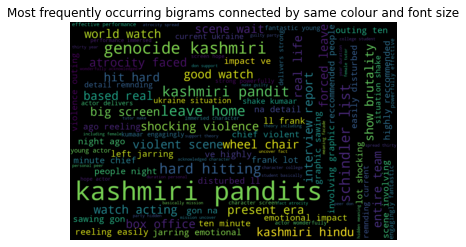

In [58]:
# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 100
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=new_stopwords)

wordCloud.generate_from_frequencies(words_dict)
plt.figure(4)
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
